## SetUp - Enviroment

In [1]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils  import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Add, Input, Reshape, multiply, Lambda, Concatenate
from keras.datasets import cifar10
from keras import optimizers, regularizers
from keras.datasets import cifar10
from keras import optimizers, regularizers
from keras.models import Model 
from tensorflow.keras.regularizers import l2
import numpy as np
#from google.colab import drive
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, CSVLogger
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import cv2 as cv
from tensorflow.keras.utils import to_categorical


In [2]:
import tensorflow as tf
for gpu in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
"""from google.colab import drive
drive.mount('/content/drive/')"""

"from google.colab import drive\ndrive.mount('/content/drive/')"

In [4]:
path='./'
os.chdir(path)
print(os.getcwd())
print(os.listdir())

d:\Programs\pythonEnviroment\venv\PycharmProjects\DeepAvanzado-ResNet50-tennis
['bagan_gp_inference.ipynb', 'improved_bagan_gp.py', 'model_config_cbam.json', 'model_config_pre_se.json', 'model_se_config.json', 'ResNet50_nosqueze-0.66-good.png', 'ResNet50_SENet.ipynb', 'ResNet50_tennis-0.66-good.ipynb', 'ResNet50_tennis.ipynb', 'test', 'train', 'weights-model_cbam', 'weights-model_se_preblock', 'weights-nofreezing', 'weights-nofreezing-0.66-good', 'weights-nofreezing-0.67', 'weights-withfreezing']


In [5]:
#%cd /content/drive/MyDrive/DeepLearningAvanzado-perafan

%mkdir weights-withfreezing/
%mkdir weights-withfreezing/tensorboard/
%mkdir weights-withfreezing/csvlogger/
%mkdir weights-withfreezing/gradscam/

%mkdir weights-nofreezing/
%mkdir weights-nofreezing/tensorboard/
%mkdir weights-nofreezing/csvlogger/
%mkdir weights-nofreezing/gradscam/

%mkdir weights-model_se_preblock/
%mkdir weights-model_se_preblock/tensorboard/
%mkdir weights-model_se_preblock/csvlogger/
%mkdir weights-model_se_preblock/gradscam/

%mkdir weights-model_se_preblock/
%mkdir weights-model_se_preblock/tensorboard/
%mkdir weights-model_se_preblock/csvlogger/
%mkdir weights-model_se_preblock/gradscam/

%mkdir weights-model_cbam/
%mkdir weights-model_cbam/tensorboard/
%mkdir weights-model_cbam/csvlogger/
%mkdir weights-model_cbam/gradscam/

La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.
La sintaxis del comando no es correcta.


In [6]:
%ls

 El volumen de la unidad D es Software
 El n�mero de serie del volumen es: CC07-9A60

 Directorio de d:\Programs\pythonEnviroment\venv\PycharmProjects\DeepAvanzado-ResNet50-tennis

11/11/2022  02:16 p.�m.    <DIR>          .
11/11/2022  11:50 p.�m.    <DIR>          ..
11/11/2022  12:20 p.�m.            43.854 bagan_gp_inference.ipynb
10/11/2022  11:48 p.�m.            20.102 improved_bagan_gp.py
11/11/2022  11:56 p.�m.           105.846 model_config_cbam.json
11/11/2022  02:16 p.�m.            48.636 model_config_pre_se.json
11/11/2022  11:34 a.�m.            68.450 model_se_config.json
05/11/2022  09:50 p.�m.         1.096.782 ResNet50_nosqueze-0.66-good.png
11/11/2022  11:57 p.�m.         2.629.049 ResNet50_SENet.ipynb
09/11/2022  11:09 p.�m.           330.871 ResNet50_tennis.ipynb
07/11/2022  08:24 p.�m.           345.939 ResNet50_tennis-0.66-good.ipynb
06/11/2022  12:09 a.�m.    <DIR>          test
06/11/2022  12:09 a.�m.    <DIR>          train
11/11/2022  11:50 p.�m.    <DIR>   

### Load Dataset

In [7]:
from tqdm.auto import tqdm
def load_RGB_resources(folder):
  etiquetas = os.listdir('train')
  print(etiquetas)
  images = []
  labels=[]
  for categoria in etiquetas:
    print("leyendo categoria", categoria)
    #se asigna un indice a la categoría, el cual servirá como una de las clases del vector target
    class_num = etiquetas.index(categoria)
    #folder será train o test
    ruta = os.path.join(folder,categoria)
    for img in tqdm(os.listdir(ruta)):
      # Se itera sobre la ruta Ej. train/adidas - y dentro de este folder habrá varias imágenes lo que haremos será leerlas y reedimensionarlas
      img_array = cv.imread(os.path.join(ruta, img), cv.COLOR_BGR2RGB)
      new_array = cv.resize(img_array,(32,32))
      # Se lee la imágen de la respectiva ruta, y como anteriormente se está iterando en
      #categoría, ingres la clase al vector de labels (target), y la imágen al array de imágenes
      #Se encuentran en el mismo orden por ende la clase corresponderá a la imágen Ej. Imagen de adidas - Corresponde a la clase adidas (class 0)
      images.append(new_array)
      labels.append(class_num)
  return np.array(images) , np.array(labels)

In [8]:
x_train, y_train = load_RGB_resources('train')
x_test, y_test= load_RGB_resources('test')

x_train = x_train.reshape((x_train.shape[0],32,32,3))
x_test = x_test.reshape((x_test.shape[0],32,32,3))

['adidas', 'converse', 'nike']
leyendo categoria adidas


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/237 [00:00<?, ?it/s]

['adidas', 'converse', 'nike']
leyendo categoria adidas


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/38 [00:00<?, ?it/s]

In [9]:
print("La dimensión de los datos para entrenamiento es: ", x_train.shape)
print("La dimensión de las etiquetas para los datos de entrenamiento es: ", y_train.shape)
print("La dimensión de los datos para validacion es: ", x_test.shape)
print("La dimensión de las etiquetas para los datos de validacion es: ", y_test.shape)

La dimensión de los datos para entrenamiento es:  (711, 32, 32, 3)
La dimensión de las etiquetas para los datos de entrenamiento es:  (711,)
La dimensión de los datos para validacion es:  (114, 32, 32, 3)
La dimensión de las etiquetas para los datos de validacion es:  (114,)


In [10]:
def preprocess_input(data):
    mean = np.mean(data, axis=(0,1,2,3))
    std = np.std(data, axis=(0,1,2,3))
    data = (data - mean)/(std + 1e-7)
    return data

In [11]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [12]:
print("La dimensión de los datos para entrenamiento es: ", x_train.shape)
print("La dimensión de las etiquetas para los datos de entrenamiento es: ", y_train.shape)
print("La dimensión de los datos para validacion es: ", x_test.shape)
print("La dimensión de las etiquetas para los datos de validacion es: ", y_test.shape)

La dimensión de los datos para entrenamiento es:  (711, 32, 32, 3)
La dimensión de las etiquetas para los datos de entrenamiento es:  (711,)
La dimensión de los datos para validacion es:  (114, 32, 32, 3)
La dimensión de las etiquetas para los datos de validacion es:  (114,)


In [13]:
y_test_cm = y_test.copy()

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
import random

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


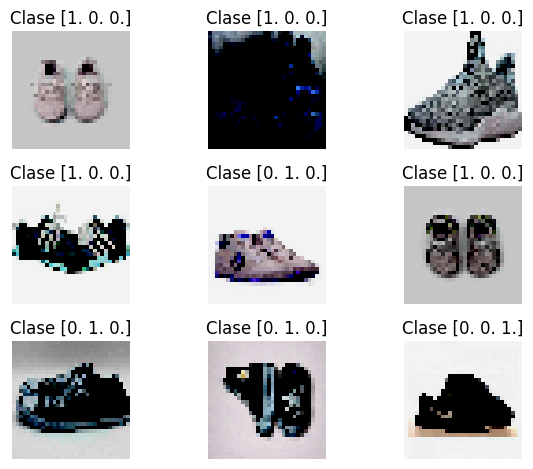

In [16]:
#Revisando algunas imagenes del dataset y corroborar informacion
fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  #ax[i[]].subplot(3,3,i+1)
  num = random.randint(0, len(x_train))
  i.imshow(x_train[num], cmap='gray')
  i.set_title("Clase {}".format(y_train[num]))
plt.tight_layout()
plt.show()

### CBAM

In [17]:
import cv2 
from keras.utils import img_to_array
from IPython.display import Image, display

In [18]:
## crearemos algunas funciones que nos ayudaran a entender el funcionamiento del cbam
#modulo de atencion de canal

def ch_attention(input_t, ratio=16):
  inputs = input_t
  channel_axis = 1 if K.image_data_format()=='channel_first' else -1
  filters = inputs.shape[channel_axis]

  #crear nuestra mlp compartida
  MLP_LAYER_S1 = Dense(filters // ratio,activation='relu',kernel_initializer='he_normal',use_bias=True, bias_initializer='zeros')

  MLP_LAYER_S2 = Dense(filters, activation='relu',kernel_initializer='he_normal',use_bias=True, bias_initializer='zeros')

  #define caracteristicas dadas por el Average Pooling

  avg_pool = GlobalAveragePooling2D()(inputs)
  avg_pool = Reshape((1,1,filters))(avg_pool)
  avg_pool = MLP_LAYER_S1(avg_pool)
  avg_pool = MLP_LAYER_S2(avg_pool)

  #define caracteristicas dadas por el Max Pooling

  max_pool = GlobalMaxPooling2D()(inputs)
  max_pool = Reshape((1,1,filters))(max_pool)
  max_pool = MLP_LAYER_S1(max_pool)
  max_pool = MLP_LAYER_S2(max_pool)
  
  #sumar los 2 tipos de caracteristicas y aplicarles la funcion de activacion sigmoid

  cbam_feat_ch = Add()([avg_pool,max_pool])
  cbam_feat_ch = Activation('sigmoid')(cbam_feat_ch)
  cbam_feat_ch = multiply([inputs,cbam_feat_ch])
  return cbam_feat_ch

In [19]:
#define el modulo de atencion espacial
def spatial_attention(input_t,kz=7):
  inputs = input_t
  avg_pool = Lambda(lambda x: K.mean(x,axis =3, keepdims=True))(inputs)
  max_pool = Lambda(lambda x: K.max(x,axis =3, keepdims=True))(inputs)

  concat = Concatenate(axis = 3)([avg_pool, max_pool])
  cbam_feat_sp = Conv2D(filters=1,kernel_size=kz, strides = 1, padding='same', activation='sigmoid',kernel_initializer='he_normal',use_bias = False)(concat)
  cbam_feat_sp = multiply([inputs, cbam_feat_sp])
  return cbam_feat_sp

In [20]:
def cbam_block(input_t):
  init = input_t
  cbam_feat_ch = ch_attention(init)
  cbam_feat = spatial_attention(cbam_feat_ch)
  return cbam_feat

### ResNet - Architecture

In [21]:
#Bloque inicial
#Dado que voy a trabajar con cifar10 y las imágenes son de baja resolución voy a utilizar
#Un stride de 1. Lo recomendado para imágnes grandes es utilizar un stride de 2

In [22]:
def initial_conv(Input,filters,stride=1, kz=7):
  x = Conv2D(filters, kernel_size=(kz,kz), 
             strides=(stride,stride), padding='same', use_bias=False,
             # Debe estar en false use_bias al utilizar esto
             kernel_initializer='he_normal',
             kernel_regularizer=(l2(1e-4)))(Input)

  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x

In [23]:
#Bloque convolucional es un bottleneck, empieza con una convolucion de 1 * 1 que reduce Z (la profundidad)
#Sigue con una convolución de 3*3 y la última 1*1 que es usada para restaurar

In [24]:
def conv_block(Input, filters, stride=1):
  #Bloque para contraer
  x = Conv2D(filters,kernel_size=(1,1), strides=(stride,stride),
             padding='same', use_bias=False, kernel_initializer='he_normal',
             )(Input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

 #bloque para preservar
  x = Conv2D(filters,kernel_size=(3,3), strides=(stride,stride),
            padding='same', use_bias=False, kernel_initializer='he_normal',
            )(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

 #bloque para expandir 1*1
  x = Conv2D(filters*4,kernel_size=(1,1), strides=(stride,stride),
            padding='same', use_bias=False, kernel_initializer='he_normal',
            )(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

 #bloque skip
  skip_conv =Conv2D(filters*4,kernel_size=(1,1), strides=(stride,stride),
              padding='same', use_bias=False, kernel_initializer='he_normal',
              )(Input)
  skip = BatchNormalization()(skip_conv)

  # Suma de los bloques
  x = Add()([x, skip])
  return x

Vamos a hacer un bloque SENet

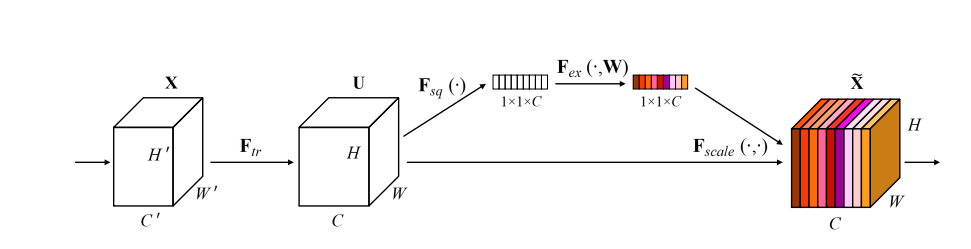

In [25]:
def squeeze_excite_block(input_t, ratio=16):
  init = input_t
  # A veces el formato H, W, C está de esta forma y otra veces está de otra C, H, W con la siguiente linea
  channel_axis = 1 if K.image_data_format() == 'channel_first' else -1
  #Aquí se crea la parte de 1 x 1 x C  de la 
  filters = init.shape[channel_axis]
  se_shape = (1, 1, filters)
  se = GlobalAveragePooling2D()(init)
  se = Reshape(se_shape)(se)
  se = Dense(filters // ratio, activation='relu',
             kernel_initializer='he_normal', use_bias=False)(se)
  se = Dense(filters, activation='sigmoid',
             kernel_initializer='he_normal', use_bias=False)(se)
  x = multiply([init, se])
  return x


In [26]:
def ident_block(Input, filters, stride=1, with_pre_se=False, with_squeeze=False, cbam=False):
  #En caso tal utilicemos el modulo pre_se


  if with_pre_se:
    squeeze = squeeze_excite_block(Input)
    x = Conv2D(filters,kernel_size=(1,1), strides=(stride,stride),
                  padding='same', use_bias=False, kernel_initializer='he_normal',
                  )(squeeze)
  else:

    x = Conv2D(filters,kernel_size=(1,1), strides=(stride,stride),
                padding='same', use_bias=False, kernel_initializer='he_normal',
                )(Input)



  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters,kernel_size=(3,3), strides=(stride,stride),
            padding='same', use_bias=False, kernel_initializer='he_normal',
            )(Input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters*4,kernel_size=(1,1), strides=(stride,stride),
          padding='same', use_bias=False, kernel_initializer='he_normal',
          )(Input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  #En caso tal utilicemos el standart se
  if with_squeeze:
    squeeze = squeeze_excite_block(x)
    x = Add()([squeeze, Input ])
    return x

  if cbam:
    cbam_feature= cbam_block(x)
    x = Add()([cbam_feature, Input ])
    return x

  x = Add()([x, Input])
  return x

In [27]:
from keras.layers.attention.multi_head_attention import activation
#vamos a crear nuestra resnet50
def build_resnet50(h,w, n_outputs, r1, r2, r3, r4, first_conv_stride=1,
                   first_conv_kernel_size=7, with_pre_se=False, with_squeeze=False, cbam=False):
  inputs =Input(shape=(h,w,3), name='img_input')
  #Bloque inicial
  x = initial_conv(inputs,64, first_conv_stride, first_conv_kernel_size)
  x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

  #Bloque convolucional 1
  x = conv_block(x,64, 1)

  #Repetir el bloque identidad r1 veces
  for i in range(r1 - 1):
    x = ident_block(x, 64,1,with_pre_se, with_squeeze, cbam)

  #-------------------------------------
  x = conv_block(x,128, 1)
  #block conv2
  #Repetir el bloque identidad r2 veces
  for i in range(r2 - 1):
    x = ident_block(x, 128,1,with_pre_se, with_squeeze, cbam)

  #------------------------------------
  #block conv3
  x = conv_block(x,256, 1)
  
  #Repetir el bloque identidad r3 veces
  for i in range(r3 - 1):
    x = ident_block(x, 256,1,with_pre_se, with_squeeze,cbam)

  #------------------------------------
  #block conv4
  x = conv_block(x,512, 1)
  
  #Repetir el bloque identidad r4 veces
  for i in range(r4 - 1):
    x = ident_block(x, 512,1,with_pre_se, with_squeeze,cbam)

  shape = K.int_shape(x)
  x = AveragePooling2D(pool_size=([shape[1],shape[2]]), strides=(1,1))(x)
  x = Flatten()(x)
  if with_squeeze:
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.0001)(x)
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.0001)(x)
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)

  if with_pre_se:
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.0001)(x)
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.0001)(x)
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)

  if cbam:
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = Dense(100,  kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
    
  
  x = Dense(n_outputs, activation='softmax')(x)
  model = Model(inputs=inputs, outputs=x)
  return model

### GRAD_SCAM

In [28]:
def get_img_array(img_path, size):
  img =keras.preprocessing.image.load_img(img_path, target_size=size)
  array = keras.preprocessing.image.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
  grad_model = keras.models.Model(
      [model.inputs],[model.get_layer(last_conv_layer_name).output, model.output]
  )
  with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(img_array)
    if pred_index is None:
      pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]

  grads = tape.gradient(class_channel, last_conv_layer_output)
  pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

  last_conv_layer_output = last_conv_layer_output[0]
  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
  heatmap = tf.squeeze(heatmap)

  heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
  return heatmap.numpy()

In [29]:
def save_and_display_gradcam(img_path, heatmap, cam_path, alpha=0.4):
  img = keras.preprocessing.image.load_img(img_path)
  img = keras.preprocessing.image.img_to_array(img)

  heatmap = np.uint8(255 * heatmap)
  jet = cm.get_cmap("jet")

  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  superimposed_img = jet_heatmap * alpha + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  superimposed_img.save(cam_path)
  display(Image(cam_path))

## ResNet - With Squeeze - standard block

### Creating model

In [29]:
model1 = build_resnet50(32,32,3,3,4,6,3,1,7, with_squeeze=True)

In [30]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9408        ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [31]:
from keras.utils.vis_utils import plot_model

In [32]:
plot_model(model1, "ResNet50_SE.png", show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Training

In [33]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [34]:
def scheduler(epoch):
    if epoch <= 15:
        return 0.0001
    elif epoch > 15 and epoch <= 30:
        return 0.000001 
    else:
        return 0.0000001

In [35]:
batch_size=15
num_ephocs = 10
#Representa el numero de imágenes que pasan por una epoca num_ephocs/batch_size
#Cada 10 ephocas guarda los pesos
nombre = "weights-withfreezing/modelo_se.ckpt"

In [36]:
my_callbacks = [
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    tf.keras.callbacks.ModelCheckpoint(filepath=nombre,
                                       save_weights_only=True, verbose=1, monitor='val_accuracy', mode='max', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='weights-withfreezing/tensorboard'),
    tf.keras.callbacks.CSVLogger(filename='weights-withfreezing/csvlogger/cvslogger.csv', separator=",", append=False)
]
model1.save_weights(nombre)

In [ ]:
history = model1.fit(x_train, y_train,epochs=50, batch_size=batch_size, validation_data=(x_test, y_test), verbose=True, callbacks=[my_callbacks])

In [ ]:
model1.load_weights('weights-withfreezing/modelo_se.ckpt')
loss, acc = model1.evaluate(x_test, y_test, verbose =1)
print("Modelo sin entrenar accuracy:{}".format(100*acc))

In [ ]:
!kill 26904
%reload_ext tensorboard
%tensorboard --logdir weights-nofreezing/tensorboard --host 0.0.0.0 

"kill" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
import pandas as pd
model_se_history = pd.read_csv('weights-withfreezing/csvlogger/cvslogger.csv')  
#model_history = pd.DataFrame(history.history)

### Visualizing

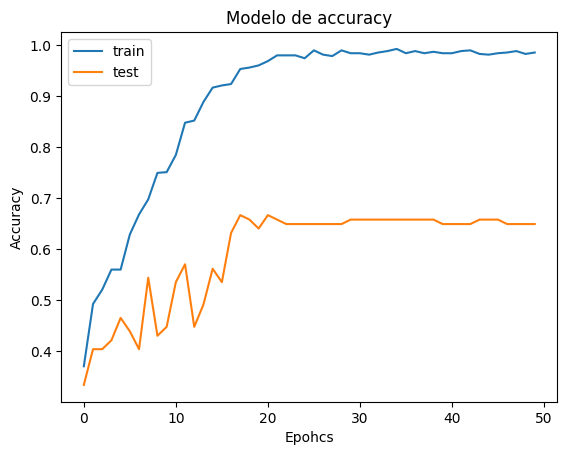

In [ ]:
plt.plot(model_se_history['accuracy'])
plt.plot(model_se_history['val_accuracy'])
plt.title("Modelo de accuracy")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

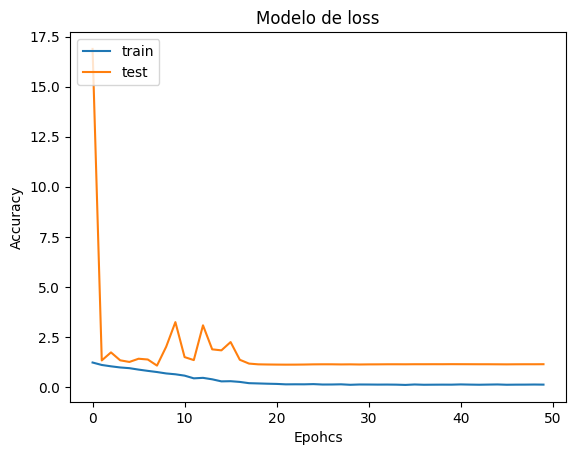

In [ ]:
plt.plot(model_se_history['loss'])
plt.plot(model_se_history['val_loss'])
plt.title("Modelo de loss")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
json_config = model1.to_json()
with open('model_se_config.json', 'w') as json_file:
    json_file.write(json_config)

In [ ]:
from tensorflow.keras.models import load_model
model1.save('weights-withfreezing/modelo_se_squeeze.h5')



In [ ]:
mod_salvado = load_model('weights-withfreezing/modelo_se_squeeze.h5')

In [ ]:
predicciones = mod_salvado.predict(x_test)

4/4 [==============================] - 2s 152ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns;sns.set()

In [ ]:
cm = confusion_matrix(y_test_cm, predicciones.argmax(1))

In [ ]:
labels = ['nike', 'converse', 'adidas']

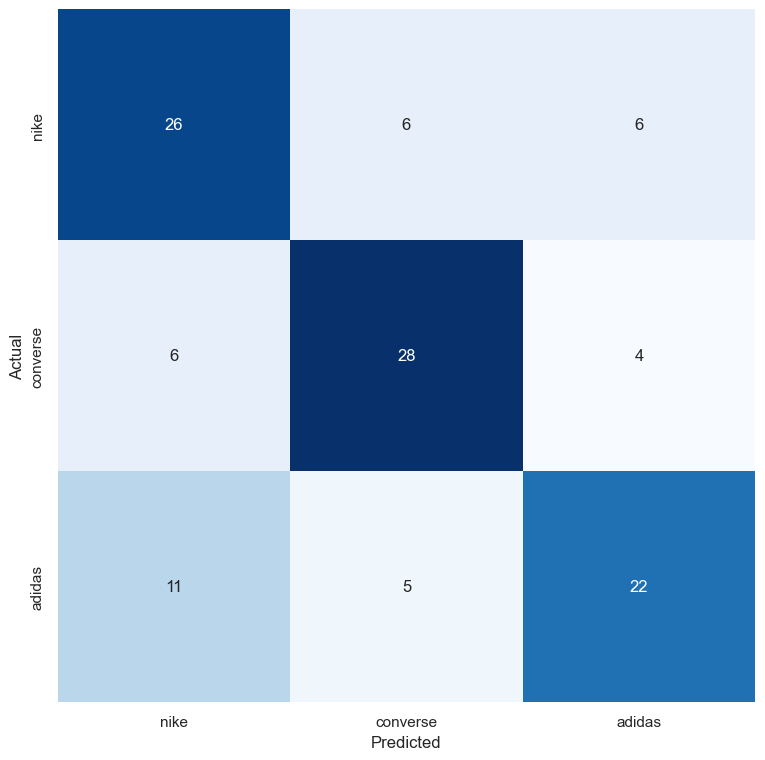

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### GradScam - squeeze -StandartBlcok-SE

In [ ]:
preprocess_input = keras.applications.resnet50.preprocess_input

In [ ]:
%ls

model_config.json               weights-model_se_preblock/
ResNet50_model_se_preblock.png  weights-nofreezing/
ResNet50_nosqueze.png           weights-withfreezing/
ResNet50.png                    Xception-Transfer-gradCam.ipynb
ResNet50_SENet.ipynb


In [ ]:
img_array = preprocess_input(get_img_array('weights-withfreezing/gradscam/nike.jpg', size=(32,32)))
mean = np.mean(img_array, axis=(0,1,2,3))
std = np.std(img_array, axis=(0,1,2,3))
img_array = (img_array - mean)/(std+1e-7)
preds1 = mod_salvado.predict(img_array)
print(str(labels[(np.argmax(preds1, axis=1))[0]]))
heatmap1 = make_gradcam_heatmap(img_array,mod_salvado, 'add_15')

1/1 [==============================] - 4s 4s/step
adidas


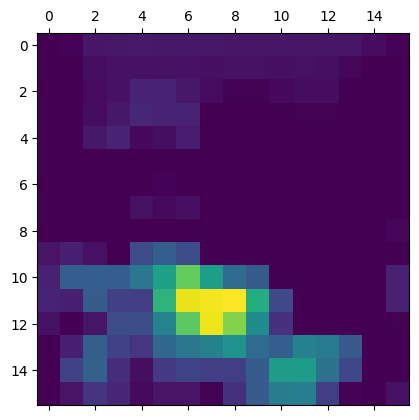

In [ ]:
plt.matshow(heatmap1)
plt.show()

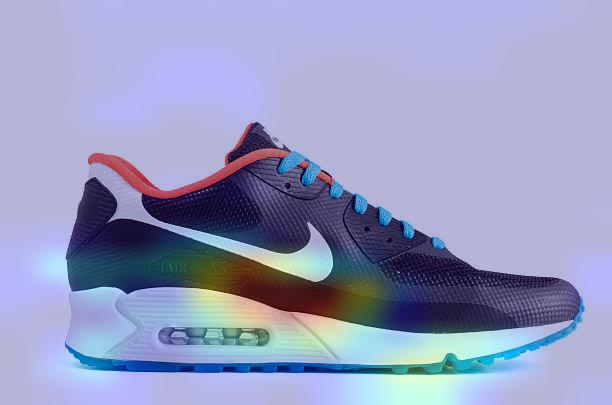

In [ ]:
save_and_display_gradcam('weights-withfreezing/gradscam/nike.jpg',heatmap1,'weights-withfreezing/gradscam/nike_se.jpg')

## ResNet - No Squeeze

### Creating model

In [ ]:
model_nosqueeze = build_resnet50(32,32,3,3,4,6,3,1,7, with_squeeze=False)
regularizer = tf.keras.regularizers.l2(0.00001)
for i in range(len(model_nosqueeze.layers)):
    if isinstance(model_nosqueeze.layers[i], tf.keras.layers.Conv2D):
        print('Adding regularizer to layer {}'.format(model_nosqueeze.layers[i].name))
        model_nosqueeze.layers[i].kernel_regularizer = regularizer

In [ ]:
model_nosqueeze.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9408        ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [ ]:
from keras.utils.vis_utils import plot_model

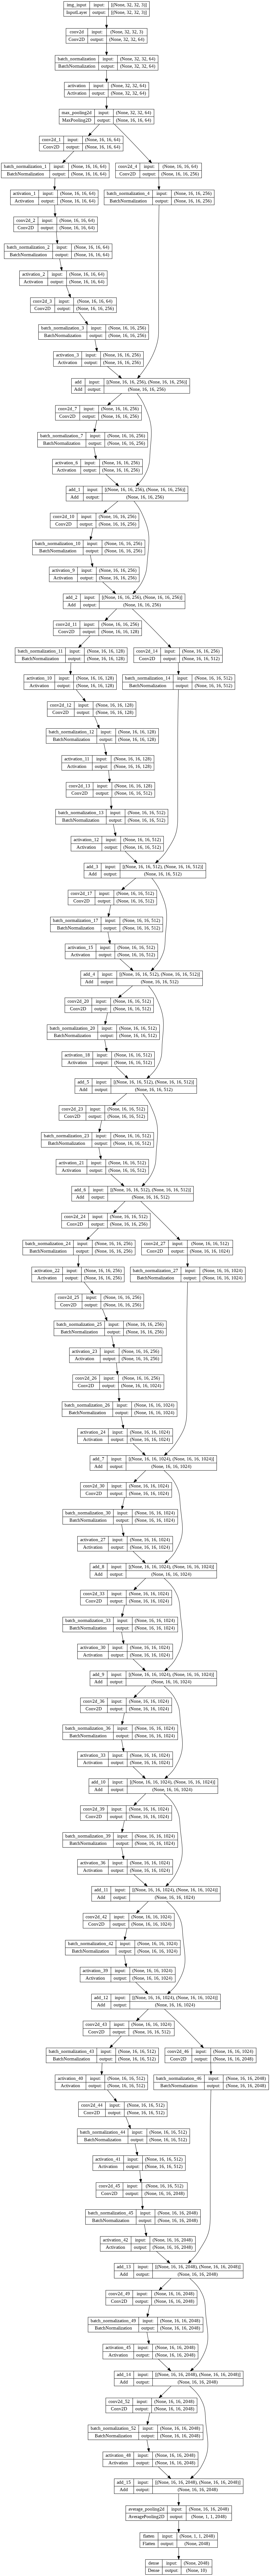

In [ ]:
plot_model(model_nosqueeze, "ResNet50_nosqueze.png", show_shapes=True,)

### Training

In [ ]:
model_nosqueeze.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
batch_size=18
num_ephocs = 3
#Representa el numero de imágenes que pasan por una epoca num_ephocs/batch_size
#Cada 5 ephocas guarda los pesos
nombre = "weights-nofreezing/model-{epoch:02d}.ckpt"

In [ ]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.1
    elif epoch > 2 and epoch <= 15:
        return 0.01 
    else:
        return 0.01

In [ ]:
my_callbacks = [
  

    tf.keras.callbacks.ModelCheckpoint(filepath=nombre,
                                       save_weights_only=True, verbose=1, monitor='val_accuracy', mode='max', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='weights-nofreezing/tensorboard'),
    tf.keras.callbacks.CSVLogger(filename='weights-nofreezing/csvlogger/cvslogger.csv', separator=",", append=False)
]
model_nosqueeze.save_weights(nombre.format(epoch=0))

In [ ]:
history = model_nosqueeze.fit(x_train, y_train,epochs=20, batch_size=batch_size, validation_data=(x_test, y_test), verbose=True, callbacks=my_callbacks)

Epoch 1/20
391/391 [==============================] - 637s 2s/step - loss: 1.4933 - accuracy: 0.4875 - val_loss: 1.4769 - val_accuracy: 0.5183
Epoch 2/20
391/391 [==============================] - 613s 2s/step - loss: 1.0538 - accuracy: 0.6283 - val_loss: 1.1958 - val_accuracy: 0.6074
Epoch 3/20
388/391 [============================>.] - ETA: 4s - loss: 0.8905 - accuracy: 0.6892
Epoch 3: saving model to weights-nofreezing/model-03.ckpt
391/391 [==============================] - 609s 2s/step - loss: 0.8902 - accuracy: 0.6892 - val_loss: 1.3796 - val_accuracy: 0.5634
Epoch 4/20
391/391 [==============================] - 614s 2s/step - loss: 0.7676 - accuracy: 0.7353 - val_loss: 0.9800 - val_accuracy: 0.6693
Epoch 5/20
391/391 [==============================] - 613s 2s/step - loss: 0.6679 - accuracy: 0.7723 - val_loss: 1.2280 - val_accuracy: 0.6256
Epoch 6/20
386/391 [============================>.] - ETA: 7s - loss: 0.5982 - accuracy: 0.7975
Epoch 6: saving model to weights-nofreezing/mo

In [ ]:
model_nosqueeze.load_weights('weights-nofreezing/model-06.ckpt')
loss, acc = model_nosqueeze.evaluate(x_test, y_test, verbose =1)
print("Modelo sin squeeze accuracy:{}".format(100*acc))

313/313 [==============================] - 36s 115ms/step - loss: 0.8955 - accuracy: 0.7132
Modelo sin squeeze accuracy:71.31999731063843


In [ ]:
!kill 1287
%reload_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/DeepLearningAvanzado-perafan/weights-nofreezing/tensorboard --host 0.0.0.0 

<IPython.core.display.Javascript object>

### Visualizing

In [ ]:
import pandas as pd
model_nosqueeze_history = pd.read_csv('weights-nofreezing/csvlogger/cvslogger.csv')  
#model_history = pd.DataFrame(history.history)


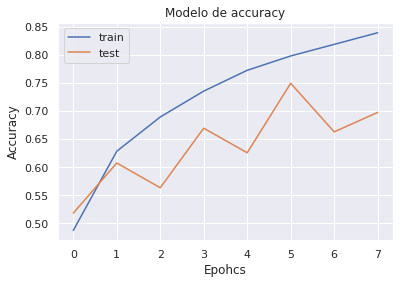

In [ ]:
plt.plot(model_nosqueeze_history['accuracy'])
plt.plot(model_nosqueeze_history['val_accuracy'])
plt.title("Modelo de accuracy")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

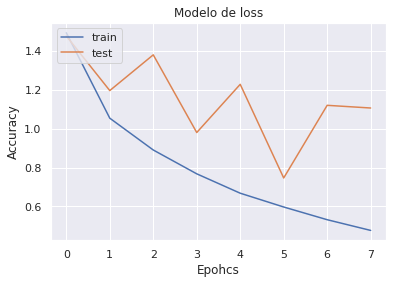

In [ ]:
plt.plot(model_nosqueeze_history['loss'])
plt.plot(model_nosqueeze_history['val_loss'])
plt.title("Modelo de loss")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
json_config = model_nosqueeze.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)

In [ ]:
from tensorflow.keras.models import load_model
model_nosqueeze.save('weights-nofreezing/modelo_no_squeeze.h5')



In [ ]:
mod_salvado = load_model('weights-nofreezing/modelo_no_squeeze.h5')

In [ ]:
predicciones = mod_salvado.predict(x_test)

313/313 [==============================] - 37s 116ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns;sns.set()

In [ ]:
cm = confusion_matrix(y_test_cm, predicciones.argmax(1))

In [ ]:
labels = ['nike', 'converse', 'adidas']

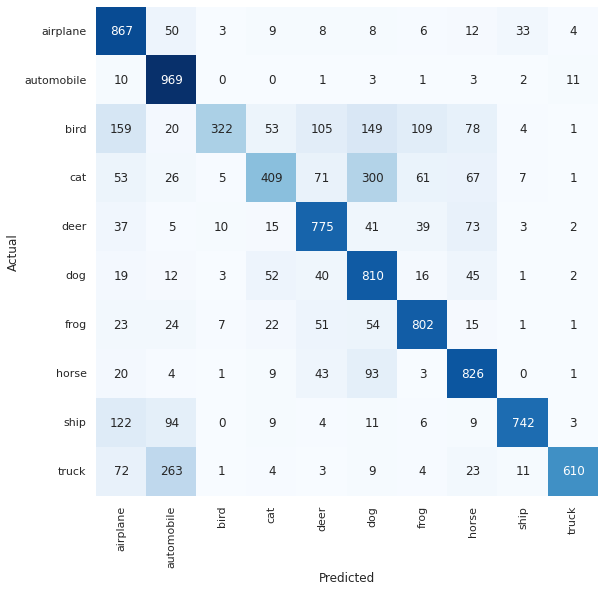

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### GradScam - No squeeze - No Block

In [ ]:
preprocess_input = keras.applications.resnet50.preprocess_input

In [ ]:
%ls

model_config.json               weights-model_se_preblock/
ResNet50_model_se_preblock.png  weights-nofreezing/
ResNet50_nosqueze.png           weights-withfreezing/
ResNet50.png                    Xception-Transfer-gradCam.ipynb
ResNet50_SENet.ipynb


In [ ]:
img_array = preprocess_input(get_img_array('weights-nofreezing/gradscam/nike.jpeg', size=(32,32)))
mean = np.mean(img_array, axis=(0,1,2,3))
std = np.std(img_array, axis=(0,1,2,3))
img_array = (img_array - mean)/(std+1e-7)
preds1 = mod_salvado.predict(img_array)
print(str(labels[(np.argmax(preds1, axis=1))[0]]))
heatmap1 = make_gradcam_heatmap(img_array,mod_salvado, 'add_15')

1/1 [==============================] - 0s 398ms/step
horse


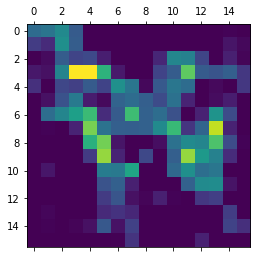

In [ ]:
plt.matshow(heatmap1)
plt.show()

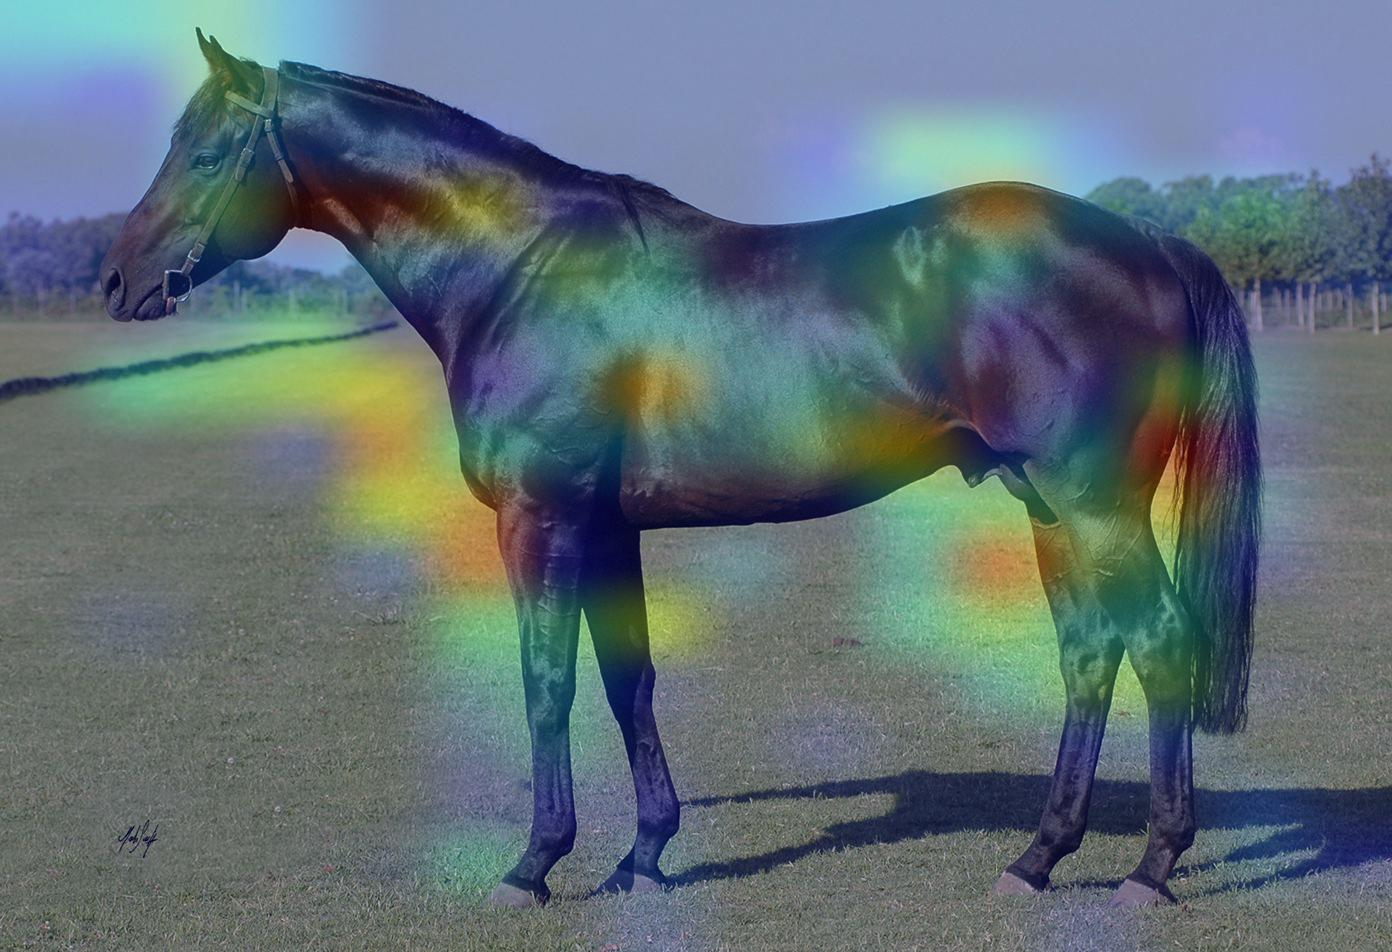

In [ ]:
save_and_display_gradcam('weights-nofreezing/gradscam/caballo1.jpeg',heatmap1,'weights-nofreezing/gradscam/caballo1_se.jpeg')

## ResNet - With squeeze_pre_Block

### Creating model

In [29]:
model_se_preblock = build_resnet50(32,32,3,3,4,6,3,1,7,with_pre_se=True, with_squeeze=False)
"""regularizer = tf.keras.regularizers.l2(0.00001)
for i in range(len(model_nosqueeze.layers)):
    if isinstance(model_nosqueeze.layers[i], tf.keras.layers.Conv2D):
        print('Adding regularizer to layer {}'.format(model_nosqueeze.layers[i].name))
        model_nosqueeze.layers[i].kernel_regularizer = regularizer"""

"regularizer = tf.keras.regularizers.l2(0.00001)\nfor i in range(len(model_nosqueeze.layers)):\n    if isinstance(model_nosqueeze.layers[i], tf.keras.layers.Conv2D):\n        print('Adding regularizer to layer {}'.format(model_nosqueeze.layers[i].name))\n        model_nosqueeze.layers[i].kernel_regularizer = regularizer"

In [30]:
model_se_preblock.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9408        ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [31]:
from keras.utils.vis_utils import plot_model

In [32]:
#plot_model(model_se_preblock, "ResNet50_model_se_preblock.png", show_shapes=True,)

from IPython.display import Image 

plot_model(model_se_preblock, show_shapes=True, show_layer_names=True, to_file='./ResNet50_model_se_preblock.png')
#Image('ResNet50_model_se_preblock.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Training

In [33]:
model_se_preblock.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [34]:
batch_size=18
num_ephocs = 3
#Representa el numero de imágenes que pasan por una epoca num_ephocs/batch_size
#Cada 5 ephocas guarda los pesos
nombre = "weights-model_se_preblock/model-preblock-se.ckpt"

In [35]:
def scheduler(epoch):
    if epoch <= 15:
        return 0.0001
    elif epoch > 15 and epoch <= 30:
        return 0.00001 
    else:
        return 0.000001

In [36]:
my_callbacks = [
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    tf.keras.callbacks.ModelCheckpoint(filepath=nombre,
                                       save_weights_only=True, verbose=1, monitor='val_accuracy',  mode='max',  save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='weights-model_se_preblock/tensorboard'),
    tf.keras.callbacks.CSVLogger(filename='weights-model_se_preblock/csvlogger/cvslogger.csv', separator=",", append=False)
]
model_se_preblock.save_weights(nombre.format(epoch=0))

In [ ]:
history = model_se_preblock.fit(x_train, y_train,epochs=100, batch_size=batch_size, validation_data=(x_test, y_test), verbose=True, callbacks=my_callbacks)

In [38]:
model_se_preblock.load_weights('weights-model_se_preblock/model-preblock-se.ckpt')
loss, acc = model_se_preblock.evaluate(x_test, y_test, verbose =1)
print("Modelo sin squeeze accuracy:{}".format(100*acc))

4/4 [==============================] - 1s 128ms/step - loss: 1.3462 - accuracy: 0.6579
Modelo sin squeeze accuracy:65.78947305679321


In [39]:
!kill 1287
%reload_ext tensorboard
%tensorboard --logdir weights-model_se_preblock/tensorboard --host 0.0.0.0 

"kill" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Visualizing

In [40]:
import pandas as pd
model_se_preblock_history = pd.read_csv('weights-model_se_preblock/csvlogger/cvslogger.csv')  
#model_history = pd.DataFrame(history.history)


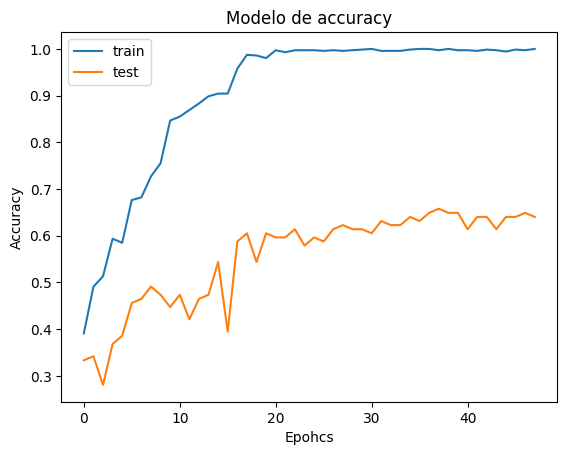

In [41]:
plt.plot(model_se_preblock_history['accuracy'])
plt.plot(model_se_preblock_history['val_accuracy'])
plt.title("Modelo de accuracy")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

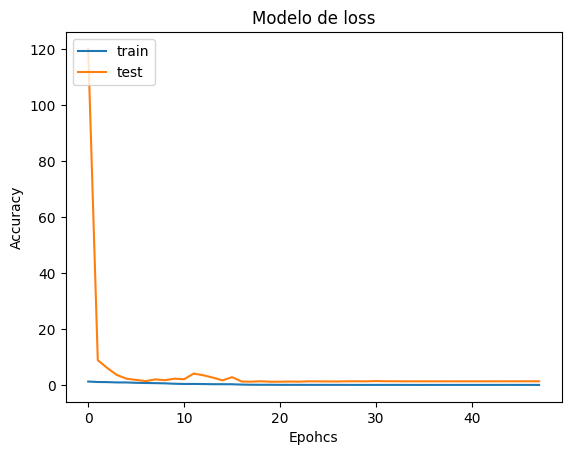

In [43]:
plt.plot(model_se_preblock_history['loss'])
plt.plot(model_se_preblock_history['val_loss'])
plt.title("Modelo de loss")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
json_config = model_se_preblock.to_json()
with open('model_config_pre_se.json', 'w') as json_file:
    json_file.write(json_config)

In [19]:
from tensorflow.keras.models import load_model

In [46]:

model_se_preblock.save('weights-model_se_preblock/modelo_model_se_preblock.h5')



In [20]:
mod_salvado = load_model('weights-model_se_preblock/modelo_model_se_preblock.h5')

In [21]:
predicciones = mod_salvado.predict(x_test)

4/4 [==============================] - 3s 100ms/step


In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns;sns.set()

In [50]:
cm = confusion_matrix(y_test_cm, predicciones.argmax(1))

In [22]:
labels = ['nike', 'converse', 'adidas']

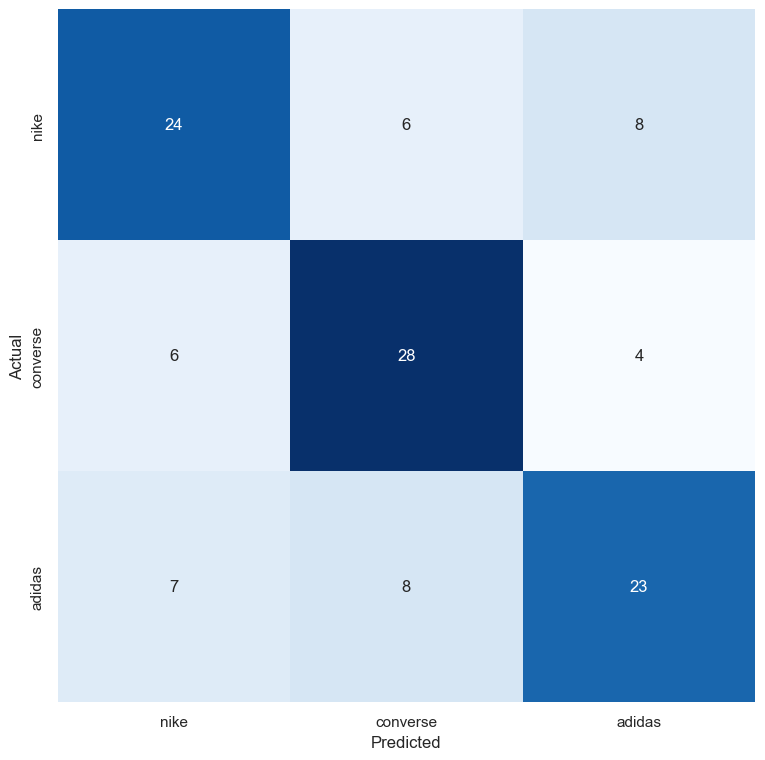

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### GradScam - SE_pre_Block

In [23]:
preprocess_input = keras.applications.resnet50.preprocess_input

In [ ]:
%ls

model_config.json               weights-model_se_preblock/
ResNet50_model_se_preblock.png  weights-nofreezing/
ResNet50_nosqueze.png           weights-withfreezing/
ResNet50.png                    Xception-Transfer-gradCam.ipynb
ResNet50_SENet.ipynb


In [24]:
img_array = preprocess_input(get_img_array('weights-model_se_preblock/gradscam/nike.jpg', size=(32,32)))
mean = np.mean(img_array, axis=(0,1,2,3))
std = np.std(img_array, axis=(0,1,2,3))
img_array = (img_array - mean)/(std+1e-7)
preds1 = mod_salvado.predict(img_array)
print(str(labels[(np.argmax(preds1, axis=1))[0]]))
heatmap1 = make_gradcam_heatmap(img_array,mod_salvado, 'add_15')

1/1 [==============================] - 0s 227ms/step
adidas


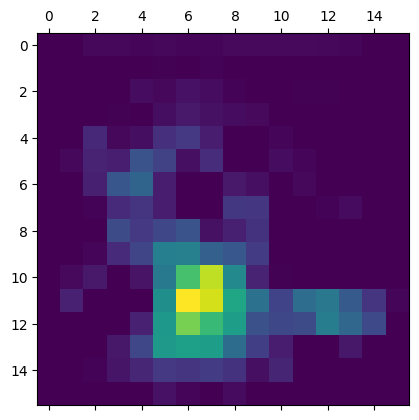

In [25]:
plt.matshow(heatmap1)
plt.show()

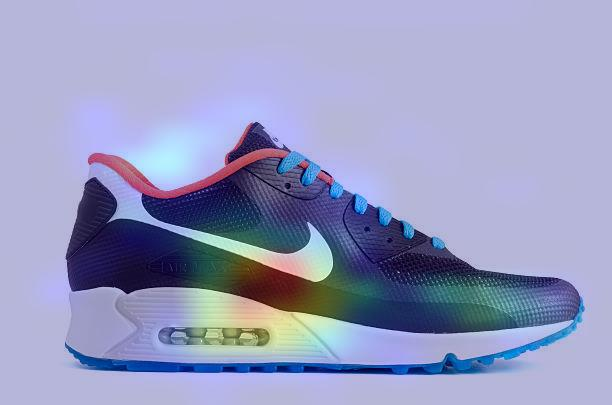

In [26]:
save_and_display_gradcam('weights-model_se_preblock/gradscam/nike.jpg',heatmap1,'weights-model_se_preblock/gradscam/nike_pre_se.jpg')

## ResNet - cbam

### Creating model

In [29]:
model_cbam = build_resnet50(32,32,3,3,4,6,3,1,7,with_pre_se=False, with_squeeze=False, cbam=True)

In [30]:
model_cbam.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9408        ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [31]:
from keras.utils.vis_utils import plot_model

In [32]:
plot_model(model_cbam, "ResNet50_model_model_cbam.png", show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Training

In [33]:
model_cbam.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [34]:
def scheduler(epoch):
    if epoch <= 20.:
        return 0.0001
    elif epoch >= 50 and epoch <= 80:
        return 0.00001
    else:
        return 0.000001


In [35]:
batch_size=12
num_ephocs = 2
#Representa el numero de imágenes que pasan por una epoca num_ephocs/batch_size
#Cada 5 ephocas guarda los pesos
nombre = "weights-model_cbam/model-best-cbam.ckpt"

In [36]:
my_callbacks = [
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    tf.keras.callbacks.ModelCheckpoint(filepath=nombre,
                                       save_weights_only=True, verbose=1, monitor='val_accuracy', mode='max', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='weights-model_cbam/tensorboard'),
    tf.keras.callbacks.CSVLogger(filename='weights-model_cbam/csvlogger/cvslogger.csv', separator=",", append=False)
]
model_cbam.save_weights(nombre)

In [37]:
history = model_cbam.fit(x_train, y_train,epochs=100, batch_size=batch_size, validation_data=(x_test, y_test), verbose=True, callbacks=my_callbacks)

Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 1.2184 - accuracy: 0.3783
Epoch 1: val_accuracy improved from -inf to 0.35965, saving model to weights-model_cbam\model-best-cbam.ckpt
60/60 [==============================] - 28s 252ms/step - loss: 1.2184 - accuracy: 0.3783 - val_loss: 7.0356 - val_accuracy: 0.3596 - lr: 1.0000e-04
Epoch 2/100
60/60 [==============================] - ETA: 0s - loss: 1.1036 - accuracy: 0.4754
Epoch 2: val_accuracy did not improve from 0.35965
60/60 [==============================] - 11s 188ms/step - loss: 1.1036 - accuracy: 0.4754 - val_loss: 2.6717 - val_accuracy: 0.3596 - lr: 1.0000e-04
Epoch 3/100
60/60 [==============================] - ETA: 0s - loss: 1.0565 - accuracy: 0.5007
Epoch 3: val_accuracy improved from 0.35965 to 0.38596, saving model to weights-model_cbam\model-best-cbam.ckpt
60/60 [==============================] - 12s 206ms/step - loss: 1.0565 - accuracy: 0.5007 - val_loss: 1.4227 - val_accuracy: 0.3860 - lr: 1.0000e

In [57]:
model_cbam.load_weights('weights-model_cbam/model-best-cbam.ckpt')
loss, acc = model_cbam.evaluate(x_test, y_test, verbose =1)
print("Modelo sin squeeze accuracy:{}".format(100*acc))

4/4 [==============================] - 1s 106ms/step - loss: 1.9401 - accuracy: 0.6316
Modelo sin squeeze accuracy:63.15789222717285


In [58]:
!kill 1287
%reload_ext tensorboard
%tensorboard --logdir weights-model_cbam/tensorboard --host 0.0.0.0 

"kill" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Reusing TensorBoard on port 6006 (pid 8248), started 11:13:28 ago. (Use '!kill 8248' to kill it.)

### Visualizing

In [59]:
import pandas as pd
model_cbam_history = pd.read_csv('weights-model_cbam/csvlogger/cvslogger.csv')  
#model_history = pd.DataFrame(history.history)


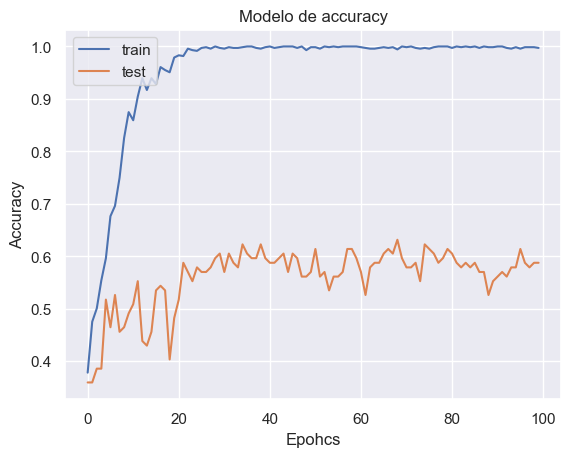

In [60]:
plt.plot(model_cbam_history['accuracy'])
plt.plot(model_cbam_history['val_accuracy'])
plt.title("Modelo de accuracy")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

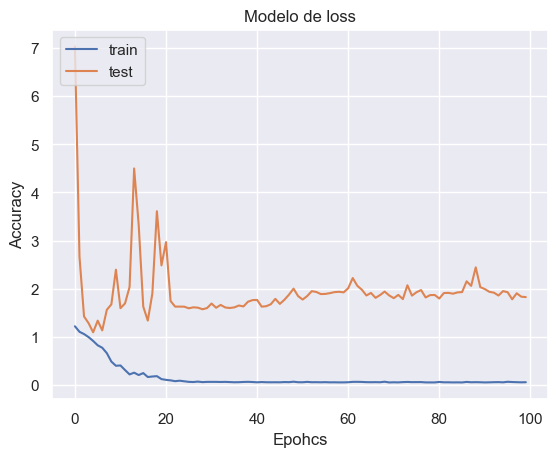

In [61]:
plt.plot(model_cbam_history['loss'])
plt.plot(model_cbam_history['val_loss'])
plt.title("Modelo de loss")
plt.xlabel('Epohcs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
json_config = model_cbam.to_json()
with open('model_config_cbam.json', 'w') as json_file:
    json_file.write(json_config)

In [30]:
from tensorflow.keras.models import load_model

In [64]:

model_cbam.save('weights-model_cbam/model_cbam.h5')



In [31]:
mod_salvado = load_model('weights-model_cbam/model_cbam.h5')

In [73]:
predicciones = mod_salvado.predict(x_test)

4/4 [==============================] - 1s 102ms/step


In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns;sns.set()

In [75]:
cm = confusion_matrix(y_test_cm, predicciones.argmax(1))

In [32]:
labels = ['nike', 'converse', 'adidas']

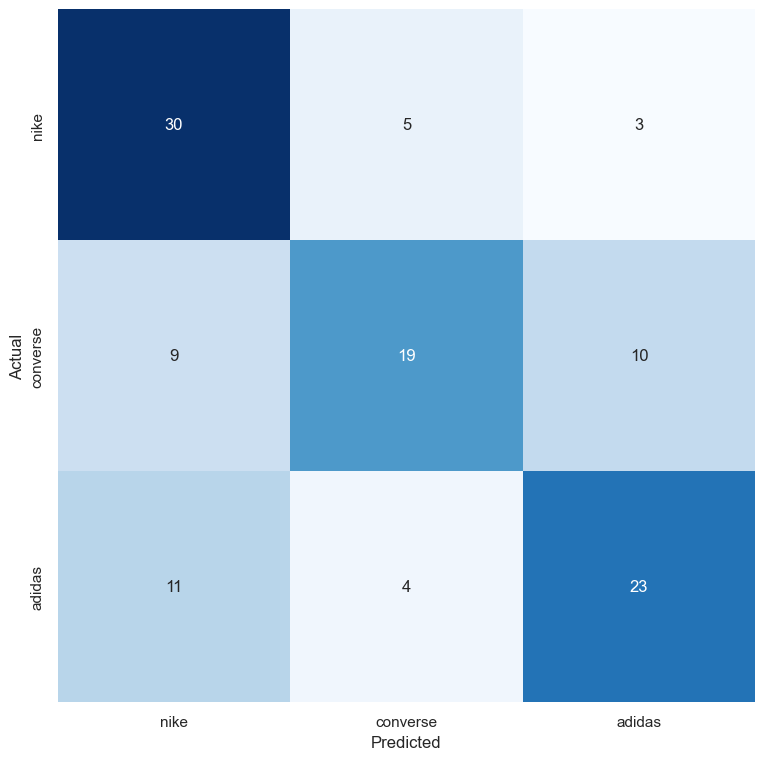

In [77]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### GradScam - cbam_Block

In [33]:
preprocess_input = keras.applications.resnet50.preprocess_input


In [53]:
%ls

 El volumen de la unidad D es Software
 El n�mero de serie del volumen es: CC07-9A60

 Directorio de d:\Programs\pythonEnviroment\venv\PycharmProjects\DeepAvanzado-ResNet50-tennis

11/11/2022  02:16 p.�m.    <DIR>          .
11/11/2022  11:50 p.�m.    <DIR>          ..
11/11/2022  12:20 p.�m.            43.854 bagan_gp_inference.ipynb
10/11/2022  11:48 p.�m.            20.102 improved_bagan_gp.py
11/11/2022  11:56 p.�m.           105.846 model_config_cbam.json
11/11/2022  02:16 p.�m.            48.636 model_config_pre_se.json
11/11/2022  11:34 a.�m.            68.450 model_se_config.json
05/11/2022  09:50 p.�m.         1.096.782 ResNet50_nosqueze-0.66-good.png
11/11/2022  11:55 p.�m.         2.623.463 ResNet50_SENet.ipynb
09/11/2022  11:09 p.�m.           330.871 ResNet50_tennis.ipynb
07/11/2022  08:24 p.�m.           345.939 ResNet50_tennis-0.66-good.ipynb
06/11/2022  12:09 a.�m.    <DIR>          test
06/11/2022  12:09 a.�m.    <DIR>          train
11/11/2022  11:50 p.�m.    <DIR>   

In [34]:
img_array = preprocess_input(get_img_array('weights-model_cbam/gradscam/nike.jpg', size=(32,32)))
mean = np.mean(img_array, axis=(0,1,2,3))
std = np.std(img_array, axis=(0,1,2,3))
img_array = (img_array - mean)/(std+1e-7)
preds1 = mod_salvado.predict(img_array)
print(str(labels[(np.argmax(preds1, axis=1))[0]]))
heatmap1 = make_gradcam_heatmap(img_array,mod_salvado, 'add_27')

1/1 [==============================] - 5s 5s/step
adidas


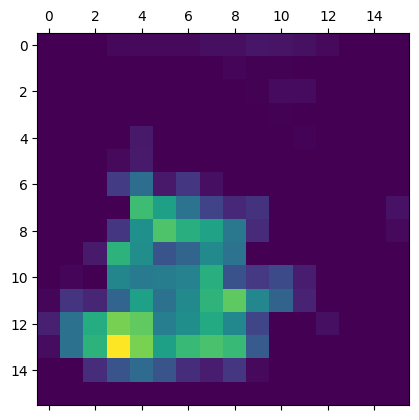

In [35]:
plt.matshow(heatmap1)
plt.show()

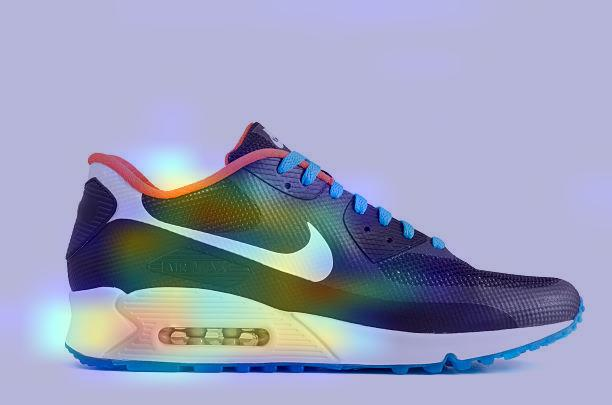

In [36]:
save_and_display_gradcam('weights-model_cbam/gradscam/nike.jpg',heatmap1,'weights-model_cbam/gradscam/nike_cbam.jpg')